In [1]:
#import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
#chargement des données/omer-Churn-Records.csv')
df=pd.read_csv('Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
# Sélection des caractéristiques et de la variable cible
#la données Complain overfit le modele
df = df.drop(['Complain'], axis = 'columns')
#enelver les variable inutile
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
# Encodage des variables catégorielles
hot = pd.get_dummies(df[['Geography', 'Gender', 'Card Type']])
df = pd.concat([df, hot], axis=1)
df = df.drop(['Geography', 'Gender', 'Card Type'], axis=1)

# Séparation des variables explicatives et de la variable cible
X = df.drop('Exited', axis=1)
X = X.values
y = df['Exited']

In [5]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,True,False,False,True,False,True,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,3,456,False,False,True,True,False,True,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,True,False,False,True,False,True,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,True,False,False,True,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,False,False,True,True,False,False,True,False,False


In [6]:
#Standard Scaller
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
X_standard[0]

array([-0.32622142,  0.29351742, -1.04175968, -1.22584767, -0.91158349,
        0.64609167,  0.97024255,  0.02188649, -0.72113042, -0.63083912,
        0.99720391, -0.57873591, -0.57380915,  1.09598752, -1.09598752,
        1.72882367, -0.57765819, -0.57658047, -0.57673443])

In [7]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.3, random_state=0)
X_train[0]

array([-0.09859236, -0.56466489, -1.04175968,  1.11721307,  0.80773656,
        0.64609167,  0.97024255, -0.77021814, -1.4324447 , -1.32579524,
        0.99720391, -0.57873591, -0.57380915, -0.91241915,  0.91241915,
        1.72882367, -0.57765819, -0.57658047, -0.57673443])

In [8]:
#balncing classes
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

In [9]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

0.806

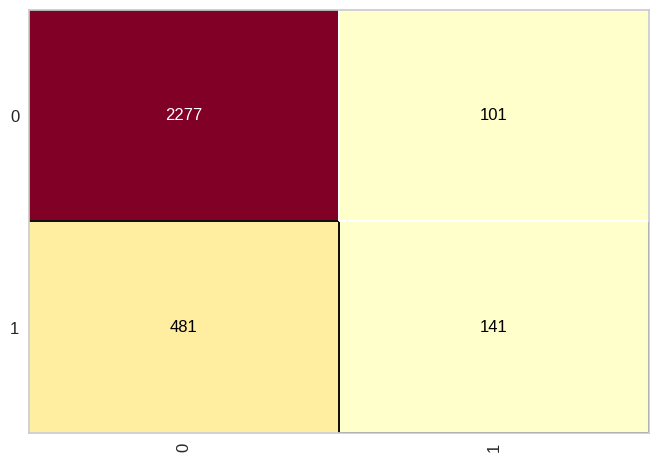

In [10]:
logistic = LogisticRegression(random_state = 1, max_iter=1000)
logistic.fit(X_train, y_train)
previsoes = logistic.predict(X_test)
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [11]:
# Liste des modèles à tester
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
   'Extra Trees': ExtraTreesClassifier()
}

In [12]:
# Dictionnaire pour stocker les résultats
results = []

# Itérer sur les modèles et afficher les résultats
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    })

In [16]:
from xgboost.sklearn import XGBClassifier

parametres = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'n_estimators': [500],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

model = XGBClassifier()
xgb_grid = RandomizedSearchCV(model,parameters, cv = 2, n_jobs = -1)
xgb_grid.fit(X_train, y_train)
accuracy=xgb_grid.best_score_
print('Score: ', xgb_grid.best_score_)
print('Params: ', xgb_grid.best_params_)

results.append({
        'Model': 'xGboost',
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    })

Score:  0.8567142857142858
Params:  {'subsample': 0.5, 'reg_lambda': 0.7, 'reg_alpha': 0.7, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 2, 'learning_rate': 0.03, 'gamma': 0.1, 'colsample_bytree': 0.3}


In [17]:
# Créer un DataFrame pour résumer les résultats
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.706333,0.799501,0.706333,0.731953
1,Random Forest,0.862667,0.854999,0.862667,0.856591
2,Gradient Boosting,0.795333,0.840923,0.795333,0.808944
3,Support Vector Machine,0.792000,0.833990,0.792000,0.805147
4,K-Nearest Neighbors,0.713000,0.780964,0.713000,0.734946
5,Decision Tree,0.800667,0.803300,0.800667,0.801935
6,Naive Bayes,0.710667,0.794427,0.710667,0.734974
7,Extra Trees,0.854333,0.845554,0.854333,0.837144
8,xGboost,0.854286,0.845554,0.854333,0.837144
9,xGboost,0.856714,0.845554,0.854333,0.837144


# Évaluation des Modèles de Classification

## Précision (Precision)
- **Définition** : La proportion des prédictions positives correctes parmi toutes les prédictions positives effectuées.
- **Utilisation** : Indique la précision des prédictions positives. Utile lorsque le coût des faux positifs est élevé.

## Rappel (Recall ou Sensibilité)
- **Définition** : La proportion des prédictions positives correctes parmi tous les échantillons positifs réels.
- **Utilisation** : Indique la capacité du modèle à détecter les échantillons positifs. Utile lorsque le coût des faux négatifs est élevé.

## F1-Score
- **Définition** : La moyenne harmonique de la précision et du rappel.
- **Utilisation** : Fournit un équilibre entre la précision et le rappel. Utile lorsque vous avez besoin d'un compromis entre précision et rappel.



* Conclusions après les entrainementde données

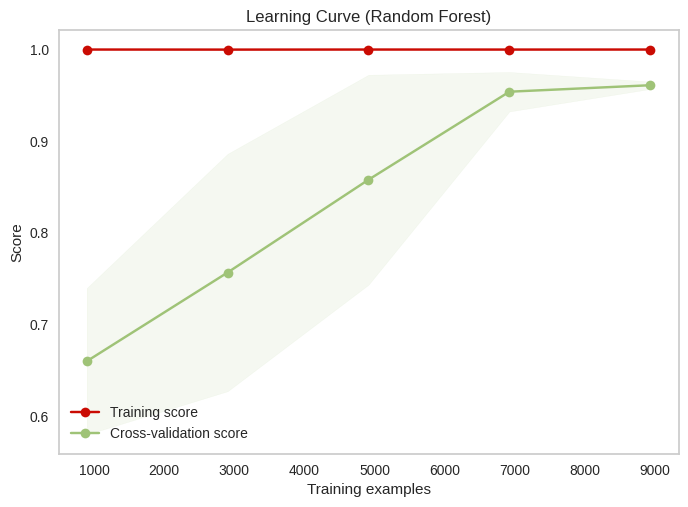

In [18]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(model, title, X, y, cv=5, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Exemple d'utilisation avec Random Forest
plot_learning_curve(RandomForestClassifier(), "Learning Curve (Random Forest)", X_train_balanced, y_train_balanced)
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Définir une grille de paramètres
param_grid = {
    'n_estimators': [100, 200, 300],  # Réduire le nombre d'arbres
    'max_depth': [3, 5, 7],           # Limiter la profondeur des arbres
    'min_samples_split': [10, 20],    # Augmenter le nombre minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [2, 5, 10],   # Augmenter le nombre minimum d'échantillons dans les feuilles
    'max_features': ['sqrt', 'log2'], # Limiter les caractéristiques prises en compte pour chaque division
    'bootstrap': [True]               # Assurez-vous que bootstrap est activé
}

# Instancier le modèle RandomForest
rf = RandomForestClassifier()

# Effectuer une recherche par grille
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs résultats
print("Meilleurs paramètres trouvés : ", grid_search.best_params_)
print("Meilleur score de validation croisée : ", grid_search.best_score_)

Meilleurs paramètres trouvés :  {'bootstrap': True, 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 200}
Meilleur score de validation croisée :  0.854570728857948


In [20]:
# Réentraîner le modèle avec les meilleurs paramètres
best_params = grid_search.best_params_

# Créer un nouveau modèle avec les meilleurs hyperparamètres
final_model = RandomForestClassifier(
    bootstrap=best_params['bootstrap'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators']
)

# Entraîner le modèle sur l'ensemble des données d'entraînement
final_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features='log2', min_samples_leaf=10,
                       min_samples_split=20, n_estimators=200)

In [21]:
# Prédire les valeurs sur les données de test
y_pred = final_model.predict(X_test)

# Évaluer la performance du modèle sur le jeu de test
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculer la précision
test_accuracy = accuracy_score(y_test, y_pred)
print("Précision sur les données de test : ", test_accuracy)

# Afficher un rapport de classification complet
print("Rapport de classification :\n", classification_report(y_test, y_pred))

# Afficher la matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

Précision sur les données de test :  0.858
Rapport de classification :
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      2378
           1       0.85      0.38      0.53       622

    accuracy                           0.86      3000
   macro avg       0.85      0.68      0.72      3000
weighted avg       0.86      0.86      0.84      3000

Matrice de confusion :
 [[2336   42]
 [ 384  238]]


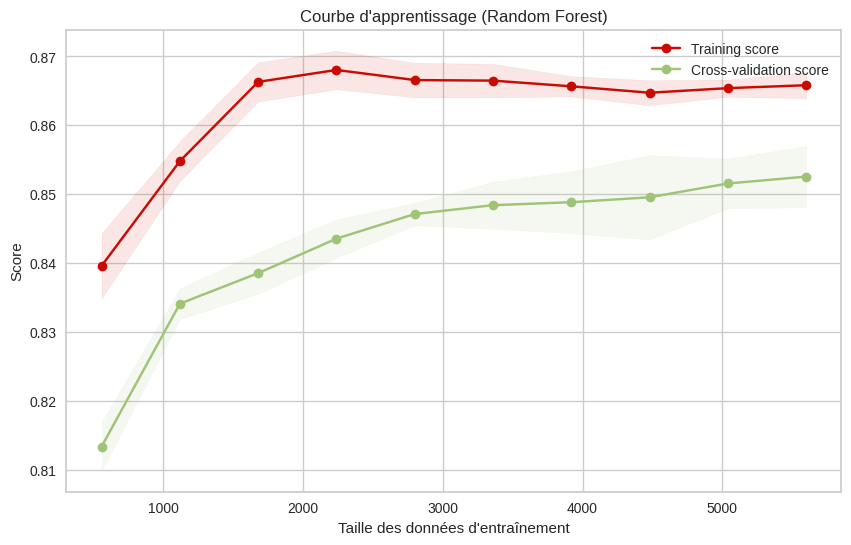

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Paramètres du modèle final
final_model = RandomForestClassifier(
    bootstrap=best_params['bootstrap'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators']
)

# Calcul des courbes d'apprentissage
train_sizes, train_scores, valid_scores = learning_curve(
    final_model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculer la moyenne et l'écart-type des scores d'entraînement et de validation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, valid_mean, 'o-', color='g', label='Cross-validation score')

# Remplir les zones d'écart-type pour les scores
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color='g', alpha=0.1)

# Étiquettes, légende et titre
plt.xlabel('Taille des données d\'entraînement')
plt.ylabel('Score')
plt.title('Courbe d\'apprentissage (Random Forest)')
plt.legend(loc='best')

# Affichage du graphique
plt.show()

In [ ]:
# import pickle

# # Choisir le modèle avec la meilleure performance selon plusieurs critères
# best_model_name = results_df.sort_values(by=['F1-Score', 'Accuracy'], ascending=False).iloc[0]['Model']
# best_model = models[best_model_name]

# # Entraîner le modèle sur l'ensemble de données complet
# best_model.fit(X_train_balanced, y_train_balanced)

# # Enregistrer le modèle
# with open('best_model.pkl', 'wb') as f:
#     pickle.dump(best_model, f)

# # Enregistrer le scaler
# with open('scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)